In [9]:
import numpy as py
import matplotlib.pyplot as plt
import seaborn as so
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.metrics import r2_score
import streamlit as st


In [10]:
import pandas as pd

df_unclean = pd.read_excel('Business_Dataset.xlsx')

print(df_unclean.size)
print(df_unclean.head)

5656965
<bound method NDFrame.head of             tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0       Table1a  2021        3           30135           33195   
1       Table1a  2021        3           30135           33195   
2       Table1a  2021        3           30140           30194   
3       Table1a  2021        3           30140           30194   
4       Table1a  2021        3           30140           30466   
...         ...   ...      ...             ...             ...   
245950  Table1a  2024        1           35412           31703   
245951  Table1a  2024        1           35412           32467   
245952  Table1a  2024        1           35412           32467   
245953  Table1a  2024        1           35412           33195   
245954  Table1a  2024        1           35412           33195   

                                 city1                                  city2  \
0       Allentown/Bethlehem/Easton, PA          Tampa, FL (Metropolitan Area)   
1      

In [11]:
df = df_unclean.drop(columns=["Geocoded_City1", "Geocoded_City2"])
df = df.dropna()

df['fare_low'] = pd.to_numeric(df['fare_low'], errors='coerce')
df['fare_lg'] = pd.to_numeric(df['fare_lg'], errors='coerce')

max_passengers = df['passengers'].max()
print(max_passengers)

df['passengers'] = py.where(df['passengers'] >= 800, 800, df['passengers'])

print(df.head)
print(df.size)

print(df.columns)

8301
<bound method NDFrame.head of             tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0       Table1a  2021        3           30135           33195   
1       Table1a  2021        3           30135           33195   
2       Table1a  2021        3           30140           30194   
3       Table1a  2021        3           30140           30194   
4       Table1a  2021        3           30140           30466   
...         ...   ...      ...             ...             ...   
245950  Table1a  2024        1           35412           31703   
245951  Table1a  2024        1           35412           32467   
245952  Table1a  2024        1           35412           32467   
245953  Table1a  2024        1           35412           33195   
245954  Table1a  2024        1           35412           33195   

                                 city1                                  city2  \
0       Allentown/Bethlehem/Easton, PA          Tampa, FL (Metropolitan Area)   
1       Al

Exploratory Analaysis
1) Average miles per flight per per year (1993 - 2024)
2) Average passenger per flight per year (1993 - 2024)

In [12]:
# Average miles and passengers per year (1993 - 2024)

grouped_df = df.groupby('Year').agg({
    'nsmiles': 'mean',
    'passengers': 'mean'
}).reset_index()

print(grouped_df)

# Insights reveal:
# Passengers- Increasing number of passengers per flight from 1993 to 2024
# Miles- Average miles per flight per year is relatively constant, indicating how flight occurences have increased with passenger travel frequency. 

    Year      nsmiles  passengers
0   1993  1152.993791  136.920737
1   1994  1137.680067  145.347152
2   1996  1161.236951  189.930904
3   1997  1165.347032  200.448776
4   1998  1157.719333  199.244874
5   1999  1159.464536  207.258535
6   2000  1169.597248  218.332667
7   2001  1167.804444  203.440088
8   2002  1176.611839  203.824169
9   2003  1193.556634  207.025684
10  2004  1195.382178  219.457641
11  2005  1192.992689  240.778883
12  2006  1201.449297  247.975535
13  2007  1204.529729  249.619167
14  2008  1209.114441  248.581744
15  2009  1205.601830  241.035118
16  2010  1212.966646  241.901050
17  2011  1208.052826  238.587736
18  2012  1198.043627  235.313064
19  2013  1193.120952  236.267883
20  2014  1198.211225  242.768322
21  2015  1200.750277  254.555515
22  2016  1201.676403  255.285019
23  2017  1197.207178  261.102190
24  2018  1198.675870  271.175076
25  2019  1194.057132  275.762624
26  2020  1233.793585  131.535933
27  2021  1208.701225  215.829014
28  2022  1187

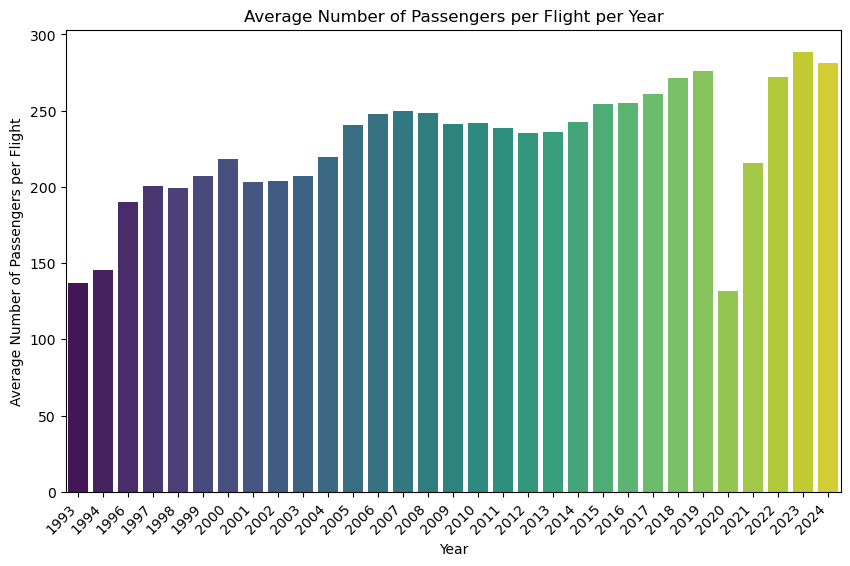

2024-09-29 10:54:47.082 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 10:54:47.115 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 10:54:47.172 
  command:

    streamlit run /Users/anusha/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-09-29 10:54:47.172 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

<Figure size 640x480 with 0 Axes>

In [13]:
# Chart for Average Number of Passengers per Flight per Year
plt.figure(figsize=(10, 6))
so.barplot(data=grouped_df, x='Year', y='passengers', palette='viridis')

plt.title('Average Number of Passengers per Flight per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Passengers per Flight')
plt.xticks(rotation=45, ha='right')
plt.show()
st.pyplot(plt)

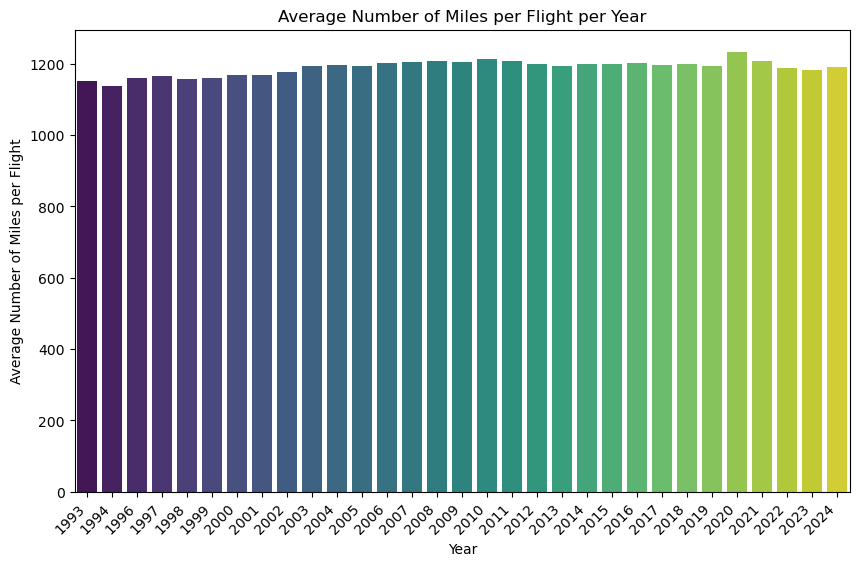

In [14]:
# Chart for Average Number of Miles per Flight per Year
plt.figure(figsize=(10, 6))
so.barplot(data=grouped_df, x='Year', y='nsmiles', palette='viridis')

plt.title('Average Number of Miles per Flight per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Miles per Flight')
plt.xticks(rotation=45, ha='right')
plt.show()

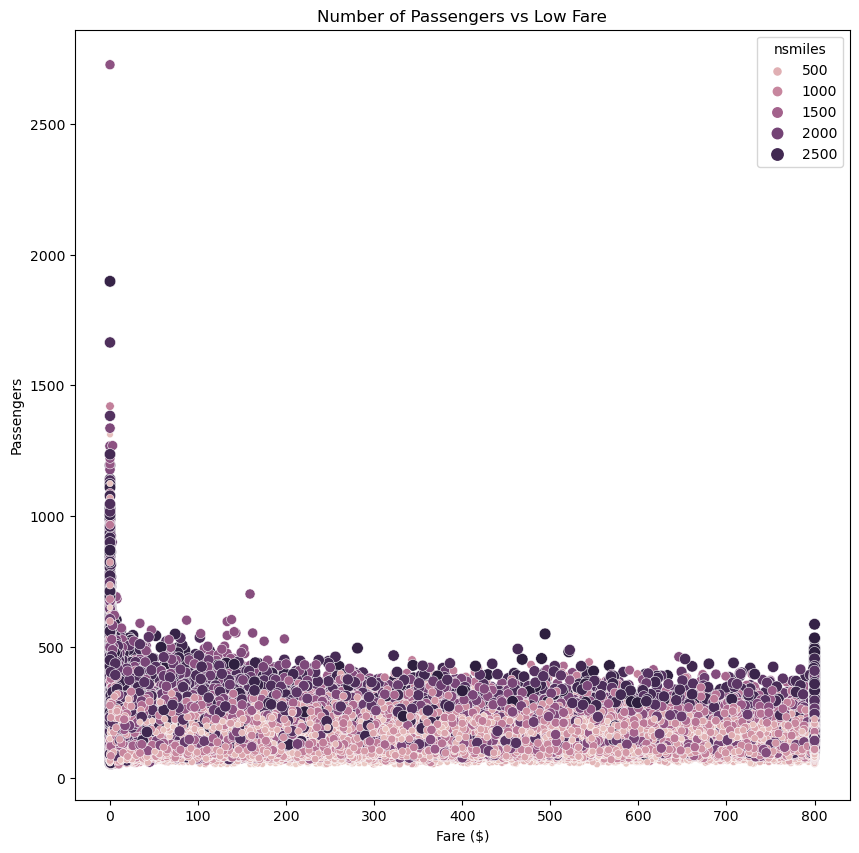

In [15]:
plt.figure(figsize=(10, 10))
so.scatterplot(data=df, x='passengers', y='fare_low', hue='nsmiles', size="nsmiles")

plt.title('Number of Passengers vs Low Fare')
plt.xlabel('Fare ($)')
plt.ylabel('Passengers')
plt.show()



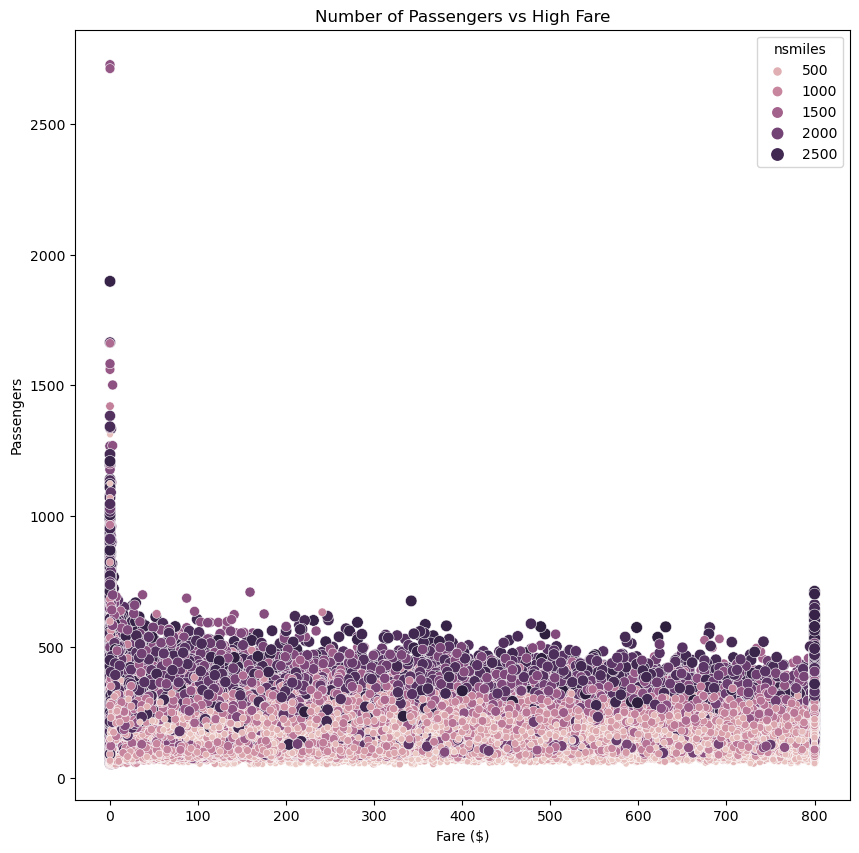

In [16]:
plt.figure(figsize=(10, 10))
so.scatterplot(data=df, x='passengers', y='fare_lg', hue='nsmiles', size="nsmiles")

plt.title('Number of Passengers vs High Fare')
plt.xlabel('Fare ($)')
plt.ylabel('Passengers')
plt.show()

<Figure size 1000x600 with 0 Axes>

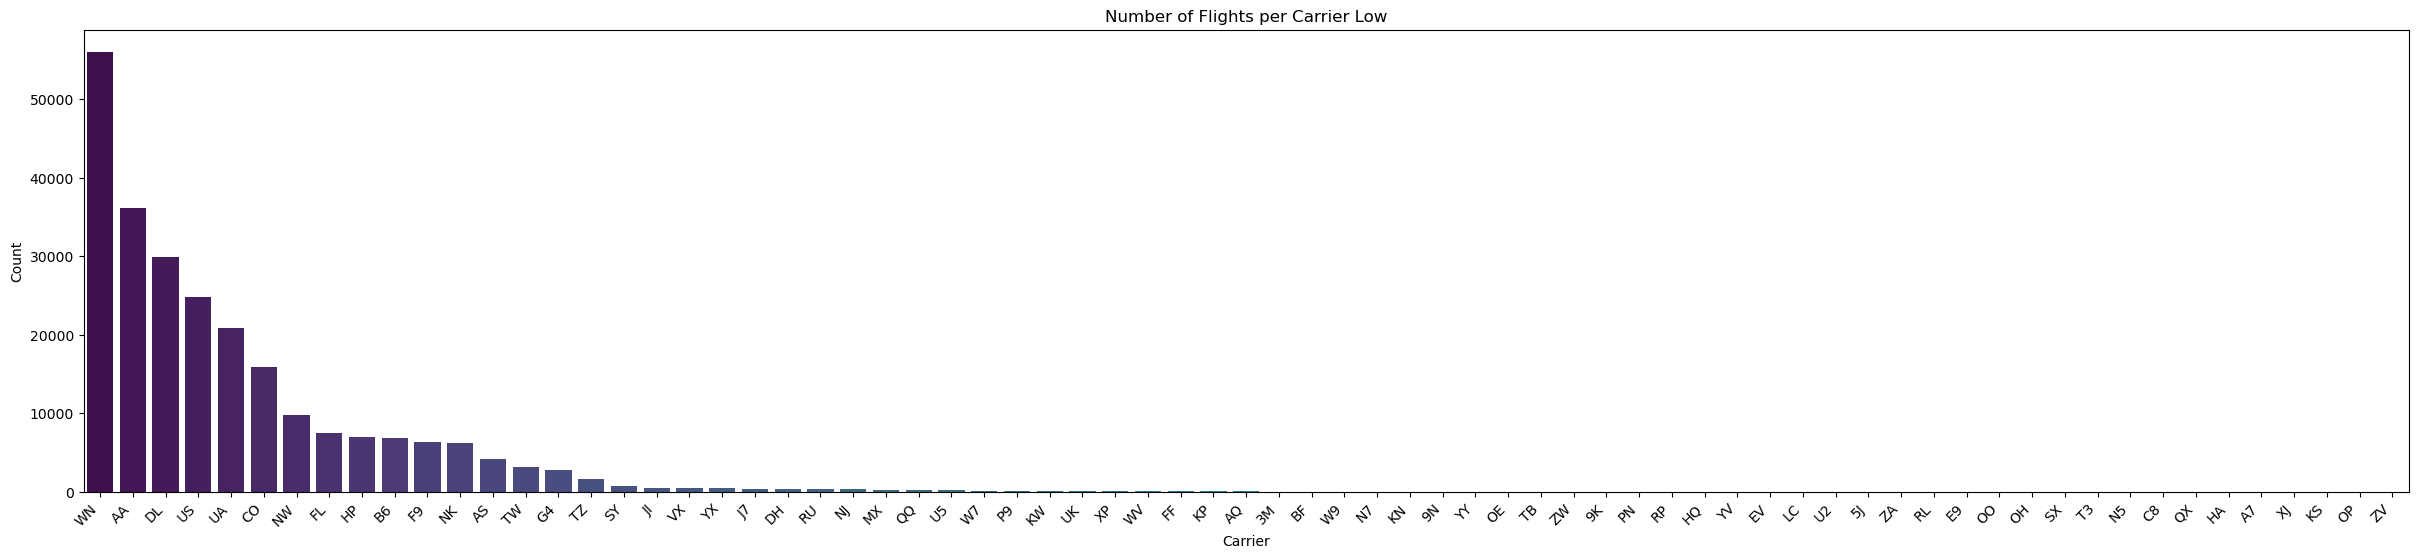

<bound method NDFrame.head of    carrier_low  count
61          WN  56027
5           AA  36189
13          DL  29949
57          US  24811
55          UA  20847
..         ...    ...
4           A7      1
63          XJ      1
27          KS      1
39          OP      1
69          ZV      1

[71 rows x 2 columns]>

In [17]:
plt.figure(figsize=(10, 6))
carrier_df = df.groupby(['carrier_low'])['carrier_low'].count().reset_index(name = "count").sort_values(by = 'count', ascending = False)

# Chart for Average Number of Passengers per Flight per Year
plt.figure(figsize=(30, 6))
so.barplot(data=carrier_df, x='carrier_low', y='count', palette='viridis')

plt.title('Number of Flights per Carrier Low')
plt.xlabel('Carrier')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
carrier_df.head

In [18]:
F9_df = df[df["carrier_low"] == "F9"]
F9_df.shape

(6273, 21)

Mean Squared Error: 81711.03466308195
R-squared: 0.059927388906224066


<Figure size 1000x700 with 0 Axes>

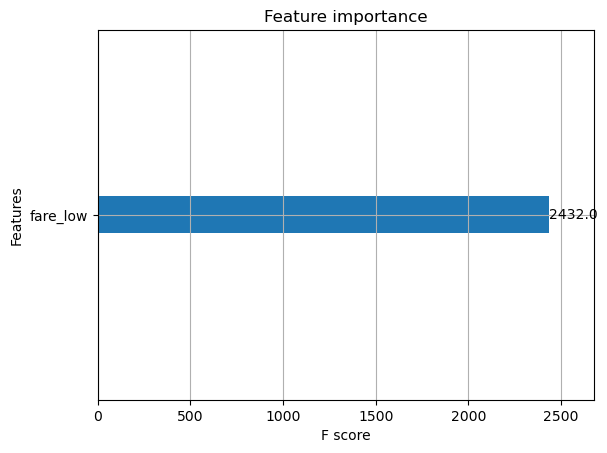

In [19]:
X = F9_df[['fare_low']]
Y = F9_df[['passengers']]

x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 7))
plot_importance(model)
plt.show()


Mean Squared Error: 47781.755380856186
R-squared: 0.45027841430797355


<Figure size 1000x700 with 0 Axes>

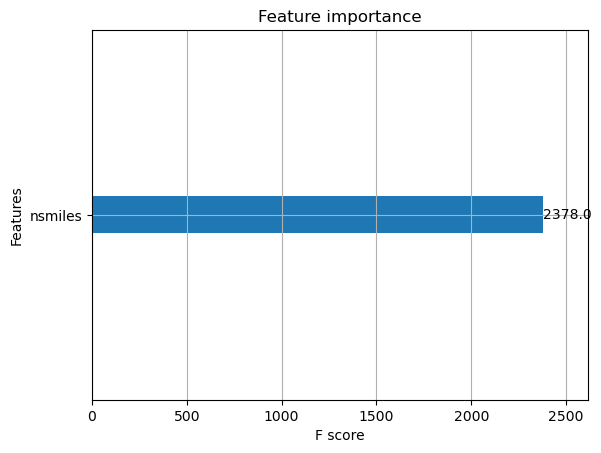

In [20]:
X = F9_df[['nsmiles']]

x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 7))
plot_importance(model)
plt.show()


Mean Squared Error: 86864.22026160415
R-squared: 0.0006407985328635846


<Figure size 1000x700 with 0 Axes>

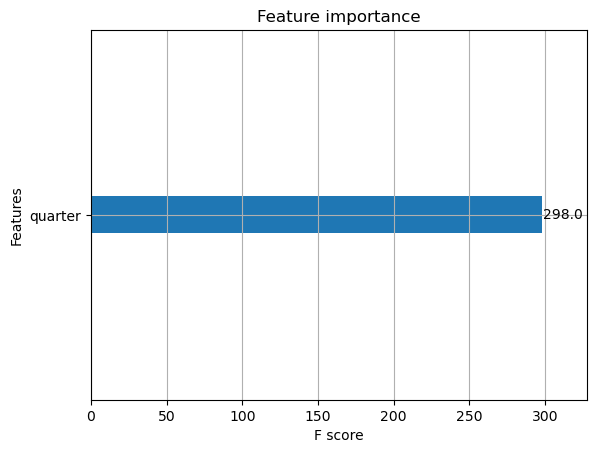

In [21]:
X = F9_df[['quarter']]

x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 7))
plot_importance(model)
plt.show()

Mean Squared Error: 43838.07389834833
R-squared: 0.49564984992704


<Figure size 1000x700 with 0 Axes>

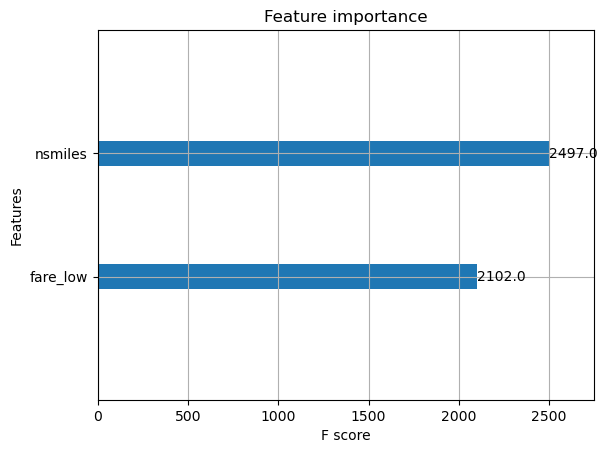

In [22]:
X = F9_df[['nsmiles', 'fare_low']]

x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 7))
plot_importance(model)
plt.show()

Mean Squared Error: 44867.19010032968
R-squared: 0.48381002977172594


<Figure size 1000x700 with 0 Axes>

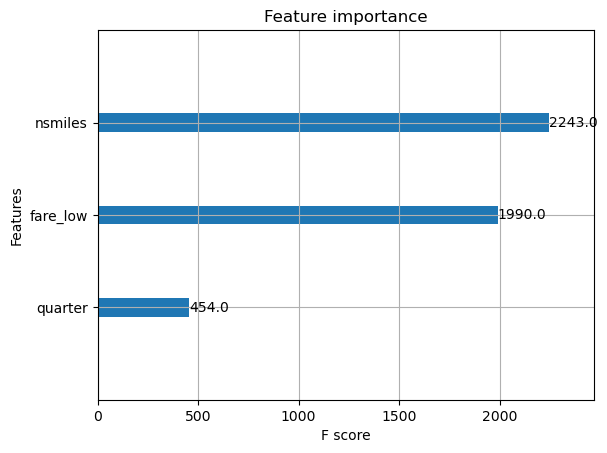

In [23]:
X = F9_df[['nsmiles', 'fare_low', 'quarter']]

x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 7))
plot_importance(model)
plt.show()

Mean Squared Error: 43838.07389834833
R-squared: 0.49564984992704


<Figure size 1000x700 with 0 Axes>

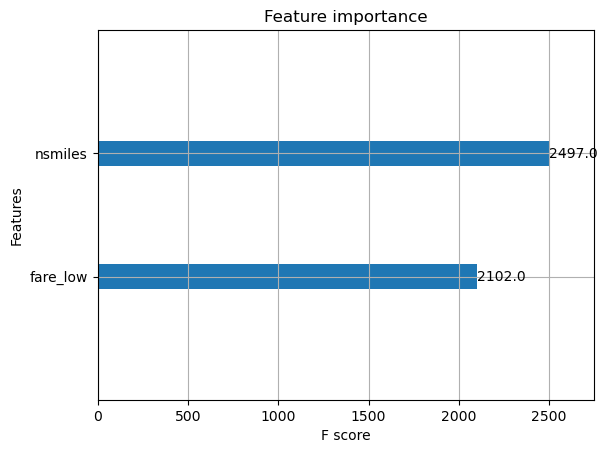

In [24]:
X = F9_df[['nsmiles', 'fare_low']]

x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 7))
plot_importance(model)
plt.show()

In [25]:
def predict_passengers(fare, nsmiles):
    input_data = py.array([[nsmiles, fare]])  
    prediction = model.predict(input_data) 
    return prediction[0]  

fare_input = 200  
nsmiles_input = 1000 

predicted_passengers = predict_passengers(fare_input, nsmiles_input)
print(f"Predicted number of passengers: {predicted_passengers}")

Predicted number of passengers: 387.0367126464844


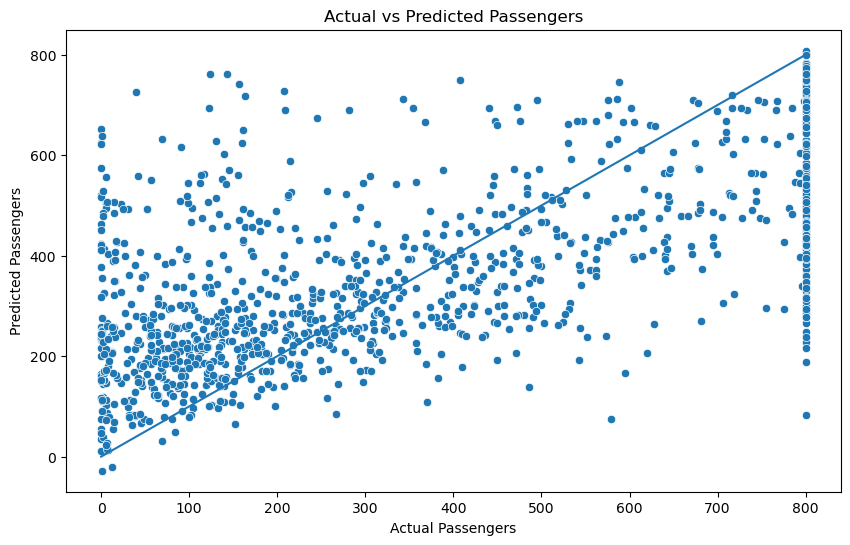

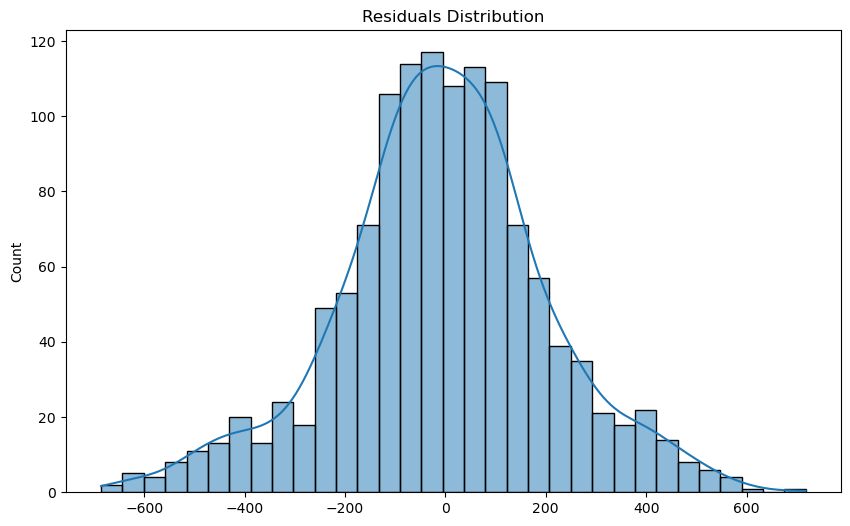

In [26]:
plt.figure(figsize=(10, 6))

so.scatterplot(x=y_test.values.flatten(), y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Passengers")
plt.ylabel("Predicted Passengers")
plt.title("Actual vs Predicted Passengers")
plt.show()

residuals = y_test.values.flatten() - y_pred
plt.figure(figsize=(10, 6))
so.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

     nsmiles nsmiles_binned
35       551       500-1000
59       631       500-1000
95      1428      1000-1500
97      1428      1000-1500
118     1476      1000-1500
Bin 0-500: Q1 = 204.5, Median = 298.0, Q3 = 558.0, IQR = 353.5
Bin 500-1000: Q1 = 201.0, Median = 540.5, Q3 = 800.0, IQR = 599.0
Bin 1000-1500: Q1 = 109.75, Median = 263.5, Q3 = 661.5, IQR = 551.75
Bin 1500-2000: Q1 = 100.0, Median = 273.5, Q3 = 604.25, IQR = 504.25
Bin 2000-2500: Q1 = 39.0, Median = 140.0, Q3 = 407.25, IQR = 368.25
Bin 2500-2724: Q1 = 1.0, Median = 11.5, Q3 = 55.0, IQR = 54.0


/var/folders/2p/fqkjd4cj6f10cz_ct97fhgxc0000gn/T/ipykernel_68463/990980986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F9_df['nsmiles_binned'] = pd.cut(F9_df['nsmiles'], bins=bins, labels=labels, include_lowest=True)


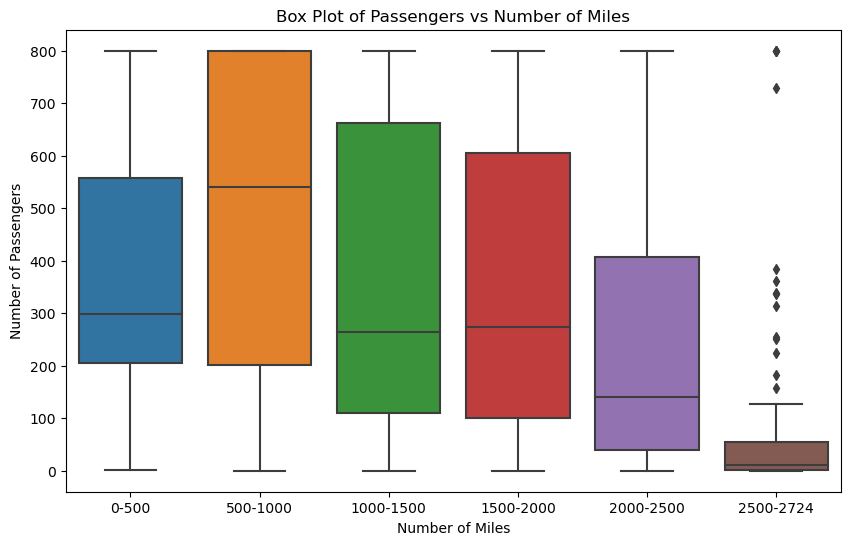

In [27]:
plt.figure(figsize=(10, 6))
bins = [0, 500, 1000, 1500, 2000, 2500, 2724]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-2724']

F9_df['nsmiles_binned'] = pd.cut(F9_df['nsmiles'], bins=bins, labels=labels, include_lowest=True)

print(F9_df[['nsmiles', 'nsmiles_binned']].head())

so.boxplot(x='nsmiles_binned', y='passengers', data = F9_df)
plt.title('Box Plot of Passengers vs Number of Miles')
plt.xlabel('Number of Miles')
plt.ylabel('Number of Passengers')

grouped = F9_df.groupby('nsmiles_binned')['passengers']
for i, group in enumerate(grouped):
    first = group[1].quantile(0.25)  # 25th percentile (Q1)
    median = group[1].quantile(0.5)
    third = group[1].quantile(0.75)  # 75th percentile (Q3)
    iqr = third - first  # Interquartile range
    print(f"Bin {group[0]}: Q1 = {first}, Median = {median}, Q3 = {third}, IQR = {iqr}")
   
plt.show()

In [28]:
fare_input = 150  
nsmiles_input = 1200  

predicted_passengers = predict_passengers(fare_input, nsmiles_input)
print(f"Predicted number of passengers: {predicted_passengers}")

capacity_F9  = {
    500 : 298,
    1000 : 541,
    1500 : 264,
    2000 : 274,
    2500 : 140,
    2724 : 11
}
bucket = 0
for key in capacity_F9:
    if nsmiles_input <= key:
        bucket = key
        break
if predicted_passengers > capacity_F9.get(bucket):
    predicted_passengers = capacity_F9.get(bucket)
    
print(f"Predicted number of passengers: {predicted_passengers}")

Predicted number of passengers: 286.4319763183594
Predicted number of passengers: 264


Mean Squared Error: 39538.57641631925
R-squared: 0.5299294924292322


<Figure size 1000x700 with 0 Axes>

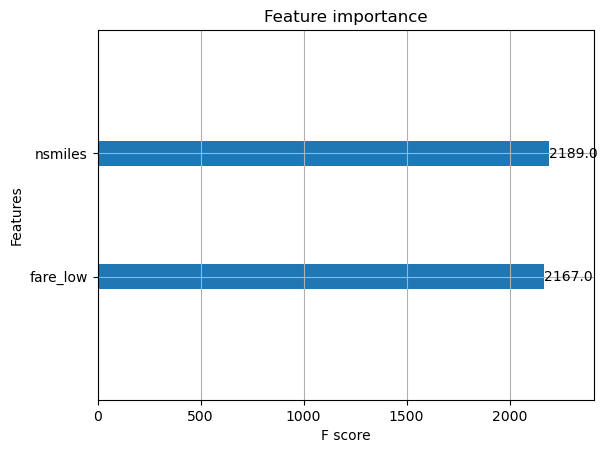

In [29]:
NK_df = df[df["carrier_low"] == "NK"]
NK_df.shape

X = NK_df[['nsmiles', 'fare_low']]
Y = NK_df[['passengers']]

x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 7))
plot_importance(model)
plt.show()


In [30]:
#spirit
fare_input = 210 
nsmiles_input = 1000 

predicted_passengers = predict_passengers(fare_input, nsmiles_input)
print(f"Predicted number of passengers: {predicted_passengers}")

Predicted number of passengers: 210.14309692382812


    nsmiles nsmiles_binned
45     1067      1000-1500
51      879       500-1000
63     1217      1000-1500
69     1048      1000-1500
81      985       500-1000


/var/folders/2p/fqkjd4cj6f10cz_ct97fhgxc0000gn/T/ipykernel_68463/95649537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NK_df['nsmiles_binned'] = pd.cut(NK_df['nsmiles'], bins=bins, labels=labels, include_lowest=True)


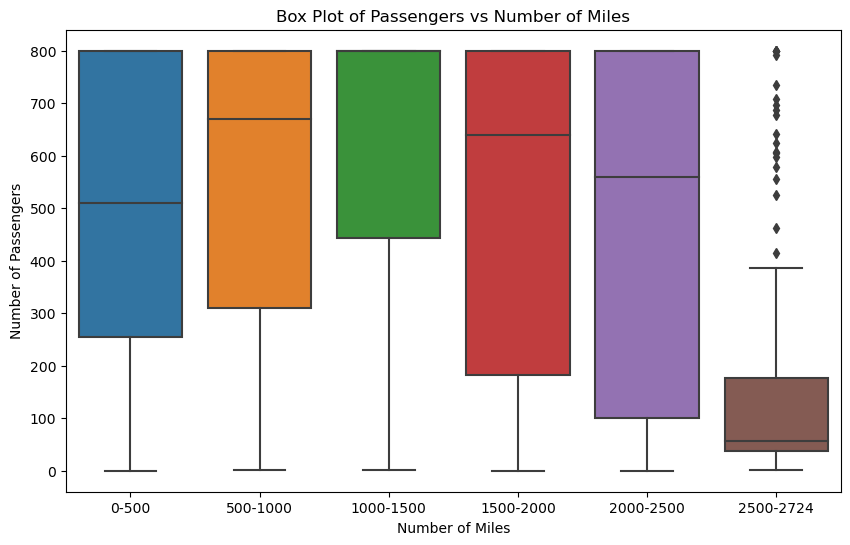

In [31]:
#spirit
plt.figure(figsize=(10, 6))
bins = [0, 500, 1000, 1500, 2000, 2500, 2724]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-2724']

NK_df['nsmiles_binned'] = pd.cut(NK_df['nsmiles'], bins=bins, labels=labels, include_lowest=True)

print(NK_df[['nsmiles', 'nsmiles_binned']].head())

so.boxplot(x='nsmiles_binned', y='passengers', data = NK_df)
plt.title('Box Plot of Passengers vs Number of Miles')
plt.xlabel('Number of Miles')
plt.ylabel('Number of Passengers')

plt.show()

    nsmiles nsmiles_binned
45     1067      1000-1500
51      879       500-1000
63     1217      1000-1500
69     1048      1000-1500
81      985       500-1000
Bin 0-500: Q1 = 254.5, Median = 509.0, Q3 = 800.0, IQR = 545.5
Bin 500-1000: Q1 = 310.0, Median = 669.0, Q3 = 800.0, IQR = 490.0
Bin 1000-1500: Q1 = 444.0, Median = 800.0, Q3 = 800.0, IQR = 356.0
Bin 1500-2000: Q1 = 181.5, Median = 640.0, Q3 = 800.0, IQR = 618.5
Bin 2000-2500: Q1 = 101.0, Median = 560.0, Q3 = 800.0, IQR = 699.0
Bin 2500-2724: Q1 = 37.0, Median = 57.0, Q3 = 177.0, IQR = 140.0


/var/folders/2p/fqkjd4cj6f10cz_ct97fhgxc0000gn/T/ipykernel_68463/2292012576.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NK_df['nsmiles_binned'] = pd.cut(NK_df['nsmiles'], bins=bins, labels=labels, include_lowest=True)


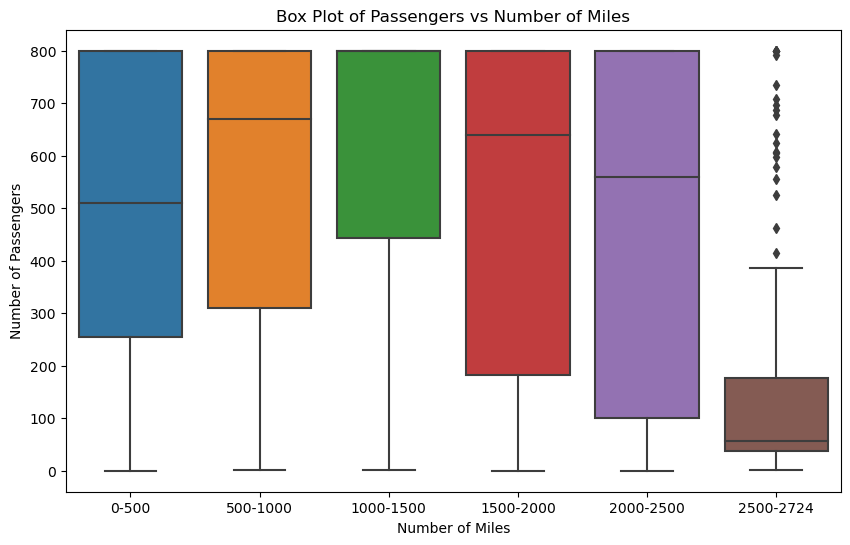

In [32]:
plt.figure(figsize=(10, 6))
bins = [0, 500, 1000, 1500, 2000, 2500, 2724]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-2724']

NK_df['nsmiles_binned'] = pd.cut(NK_df['nsmiles'], bins=bins, labels=labels, include_lowest=True)

print(NK_df[['nsmiles', 'nsmiles_binned']].head())

so.boxplot(x='nsmiles_binned', y='passengers', data = NK_df)
plt.title('Box Plot of Passengers vs Number of Miles')
plt.xlabel('Number of Miles')
plt.ylabel('Number of Passengers')

grouped = NK_df.groupby('nsmiles_binned')['passengers']
for i, group in enumerate(grouped):
    first = group[1].quantile(0.25) 
    median = group[1].quantile(0.5)
    third = group[1].quantile(0.75) 
    iqr = third - first  
    print(f"Bin {group[0]}: Q1 = {first}, Median = {median}, Q3 = {third}, IQR = {iqr}")

plt.show()


In [33]:
def output(input_fare, input_miles):
    predicted_passengers = predict_passengers(input_fare, input_miles)
    print(f"Predicted number of passengers: {predicted_passengers}")

    capacity_NK  = {
        500 : 509,
        1000 : 669,
        1500 : 800,
        2000 : 640,
        2500 : 560,
        2724 : 57
    }

    bucket = 0
    for key in capacity_NK:
        if nsmiles_input <= key:
            bucket = key
            break
    if predicted_passengers > capacity_NK.get(bucket):
        predicted_passengers = capacity_NK.get(bucket)
        
    print(f"Predicted number of passengers: {predicted_passengers}")

    crew  = {
        18 : 0,
        50 : 1,
        100 : 2
    }
    attendants = -1

    for key in crew:
        if predicted_passengers <= key:
            attendants = crew.get(key)
            break
        
    if attendants == -1:
        predicted_passengers -= 100
        attendants = predicted_passengers // 50 + 3
    print(f"Predicted number of attendants: {attendants}") 

    return [predicted_passengers, attendants]


print(output(100,1000))

Predicted number of passengers: 508.0116271972656
Predicted number of passengers: 508.0116271972656
Predicted number of attendants: 11.0
[408.0116271972656, 11.0]
